# Semana 3-4: CNN + Data augmentation
#### Equipo 5:
Jackeline Conant Rubalcava A01280544 \
Javier Eduardo Corrales Cardoza A01742328 \
José Andrés Orantes Guillén A01174130 \
Francisco Salas Porras A01177893 \
Luis Mario Lozoya Chairez A00833364


## Introducción al Notebook

Este notebook tiene como objetivo desarrollar un modelo de red neuronal convolucional, además de hacer uso de técnicas de data augmentation en imágenes del conjunto de datos cifar10. Este dataset contiene 60,000 imágenes en color de 32x32 píxeles, distribuidas en 10 clases diferentes de animales, con 6000 imágenes por clase. El conjunto de entrenamiento consta de 50,000 imágenes y el conjunto de prueba de 10,000 imágenes.

A lo largo de este notebook, se realizarán las siguientes actividades:

1. **Carga y preprocesamiento de datos**: Se cargarán los datos de cifar10 y se normalizarán para mejorar el rendimiento del modelo.
2. **Visualización de datos**: Se visualizarán algunas imágenes del conjunto de datos para entender mejor su estructura.
3. **Construcción del modelo**: Se construirá un modelo de red neuronal convolucional.
4. **Entrenamiento del modelo**: Se entrenará el modelo con los datos de entrenamiento.
5. **Evaluación del modelo**: Se evaluará el rendimiento del modelo utilizando los datos de prueba.

El objetivo final es predecir la categoría de cada prenda de vestir a partir de las imágenes proporcionadas, utilizando un modelo de red neuronal de capas densas.

### Importación de librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np

### Importación de datos

Durante clases se llegaron a observar ejemplos del uso de Redes Neuronales Convolucionales(CNN) con animales, por lo que se ha decidido tomar esta base datos que cuenta con animales y diferentes objetos. Se busca realizar la clasificación de los animales en las catagorías correctas, además se busca que la complejidad aumente con respecto a la tarea anterior, por lo que se escogieron estos datos, puesto que las imágenes son a color, además que son menos con imágenes en general, por lo que el uso de data augmentation puede ayudar con la generación de un mejor entrenamiento.

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()#Cifar10, pero se podría usar el 100

### Exploración de datos
Revisamos las dimensiones de los datos y podemos confirmar también las clases con las que cuentan estos datos

In [4]:
print('Training data shape : ', x_train.shape, y_train.shape)

print('Testing data shape : ', x_test.shape, y_test.shape)

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [5]:
classes = np.unique(y_train)
num_classes = len(classes)
print('Total number of outputs : ', num_classes)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Realizamos visualización de las imágenes que se tienen dentro de la base de datos

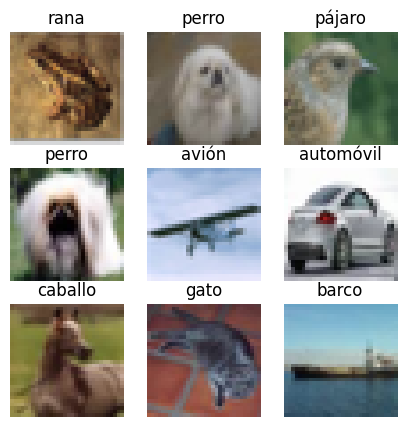

In [6]:
# Definir las etiquetas de las clases
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

# Seleccionar 9 imágenes aleatorias
indices = np.random.choice(len(x_train), 9, replace=False)
images = x_train[indices]
labels = y_train[indices]

# Crear una cuadrícula de 3x3 para mostrar las imágenes
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i][0]])
    plt.axis('off')
plt.show()


### Preprocesamiento de datos
Para que los datos puedan ser procesados posteriormente se necesita que pasen por un proceso de reescalado.

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Convertimos las etiquetas a variables One-Hot Encoded

y_train = keras.utils.to_categorical(y_train, num_classes)  # Convierte las etiquetas de entrenamiento a formato one-hot encoding
y_test = keras.utils.to_categorical(y_test, num_classes)

In [26]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 10)

### Data augmentation
Se realiza data augmentation a través de capas de preprocesamiento de Keras.

In [27]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.25),
  layers.RandomBrightness(0.2)
])

### Model Training

In [38]:
model = tf.keras.Sequential ([
    keras.Input(shape=(32,32,3)),
    data_augmentation,
    layers.Conv2D(filters=32,kernel_size=1,activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(filters=64,kernel_size=1,activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=2),
    #layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
    #layers.BatchNormalization(),
    #layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.5), 
    layers.Dense(num_classes, activation="softmax")
])

In [39]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 64)     │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 528,330 (2.02 MB)

 Trainable params: 528,138 (2.01 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1)  # Entrena el modelo con los datos de entrenamiento, usando un tamaño de lote de 32, durante 10 épocas, y con un 10% de los datos de entrenamiento utilizados como conjunto de validación

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.1188 - loss: 2.8425 - val_accuracy: 0.1548 - val_loss: 2.2281
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.1357 - loss: 2.2540 - val_accuracy: 0.2152 - val_loss: 2.1566
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.1356 - loss: 2.2577 - val_accuracy: 0.2146 - val_loss: 2.1118
Epoch 4/10
 734/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.1427 - loss: 2.2171

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Pérdida en test: {test_loss}, Precisión en test: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1006 - loss: 2.3027
Pérdida en test: 2.302685260772705, Precisión en test: 0.10000000149011612
